In [1]:

# import statementsimport pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#import utils as utils1
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import pandas as pd

In [2]:
b_perf = pd.read_csv("bodyPerformance.csv")
b_perf

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:
#b_perf.describe() 

In [4]:
b_perf["gender"].describe()

count     13393
unique        2
top           M
freq       8467
Name: gender, dtype: object

In [5]:
male_one_hot=[]
for i in b_perf["gender"]:
    if i == "M":
        i=1
    elif i == "F":
        i=0

    male_one_hot.append(i)
b_perf.insert(2, 'Male gender',male_one_hot)        
#b_perf["Male gender"] = male_one_hot

female_one_hot=[]
for i in b_perf["gender"]:
    if i == "F":
        i=1
    elif i == "M":
        i=0

    female_one_hot.append(i)
        
#b_perf["Female gender"] = female_one_hot
b_perf.insert(3, 'Female gender',female_one_hot)
b_perf.drop(columns="gender", inplace=True)
b_perf
    

,age,Male gender,Female gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,1,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,1,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,1,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,1,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,1,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [6]:
from sklearn.model_selection import train_test_split

x = b_perf.drop(labels="class",axis=1)
y = b_perf["class"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=21) # splitting the test data

In [7]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.25, random_state=42) # splitting the validation dataset

In [8]:
#x_train

In [9]:
#x_test

In [10]:
#x_val

# Model Training, Validation and testing

#### one vs. one or one vs. rest method:  

This is how the model classifies our labels. In one vs one, the model does pairs of combination of classes , where it classifies two classes and another two classes and so on. On the other hand, the one vs rest method is where one class is classified against all other classes , for instance where "A" class can be positive and other classes can be negative.

For this project I will use the one vs one method which is the default method for scikit learn SVC 

In [11]:
#svc_model = SVC(decision_function_shape="ovo")
#svc_model.fit(x_train,y_train)
#print("Training Accuracy: ",svc_model.score(x_train,y_train))
#print("Validation Accuracy: ",svc_model.score(x_test,y_test))

#### Using different values of C parameters
The C parameter adjusts the fitness of the model. It is used when we want to pay more attention to classification than distance or vice versa. If C is large the model focusses on classifying the points correctly , if C is small the model focusses on keeping the lines apart even if it makes few errors

In [12]:
#svc_model_1 = SVC(decision_function_shape="ovo",kernel="linear",C=1)
#svc_model_1.fit(x_train,y_train)
#print("Training Accuracy: ",svc_model_1.score(x_train,y_train))
#print("Validation Accuracy: ",svc_model_1.score(x_test,y_test))

In [13]:
#svc_model_2 = SVC(decision_function_shape="ovo",C=10)
#svc_model_2.fit(x_train,y_train)
#print("Training Accuracy: ",svc_model_2.score(x_train,y_train))
#print("Validation Accuracy: ",svc_model_2.score(x_val,y_val))

In [14]:
#svc_model_3 = SVC(decision_function_shape="ovo",C=1000,gamma="scale",kernel="poly")
#svc_model_3.fit(x_train,y_train)
#print("Training Accuracy: ",svc_model_3.score(x_train,y_train))
#print("Validation Accuracy: ",svc_model_3.score(x_test,y_test))

In [15]:
#svc_model_4 = SVC(decision_function_shape="ovo",C=1000,kernel="linear")
#svc_model_4.fit(x_train,y_train)
#print("Training Accuracy: ",svc_model_4.score(x_train,y_train))
#print("Validation Accuracy: ",svc_model_4.score(x_test,y_test))

In [16]:
#svc_model_4 = SVC(decision_function_shape="ovo",C=1000,gamma="auto",kernel="rbf")
#svc_model_4.fit(x_train,y_train)
#print("Training Accuracy: ",svc_model_4.score(x_train,y_train))
#print("Validation Accuracy: ",svc_model_4.score(x_test,y_test))

In [17]:
#svc_model_5 = SVC(decision_function_shape="ovo",gamma=0.08,kernel="rbf")
#svc_model_5.fit(x_train,y_train)
#print("Training Accuracy: ",svc_model_5.score(x_train,y_train))
#print("Validation Accuracy: ",svc_model_5.score(x_test,y_test))

In [18]:
#svc_model_6 = SVC(decision_function_shape="ovo",gamma=0.0005,kernel="rbf")
#svc_model_6.fit(x_train,y_train)
#print("Training Accuracy: ",svc_model_6.score(x_train,y_train))
#print("Validation Accuracy: ",svc_model_6.score(x_test,y_test))

In [19]:
#svc_model_7 = SVC(decision_function_shape="ovo",gamma=0.0009,kernel="rbf")
#svc_model_7.fit(x_train,y_train)
#print("Training Accuracy: ",svc_model_7.score(x_train,y_train))
#print("Validation Accuracy: ",svc_model_7.score(x_test,y_test))

In [20]:
svc_model_8 = SVC(decision_function_shape="ovo",gamma=0.00078,kernel="rbf")
svc_model_8.fit(x_train,y_train)
print("Training Accuracy: ",svc_model_8.score(x_train,y_train))
print("Validation Accuracy: ",svc_model_8.score(x_test,y_test))


Training Accuracy:  0.7137523335407592
Validation Accuracy:  0.6603210153042179


**My final choice of hyperparameters are gamma=0.00078,kernel="rbf" for "svc_model_8"**. The training accuracy is good and the validation accuracy is also good. It has more accuracy with the validation set. The gamma value of "0.00078" does not overfit the dataset and it classifies the dataset with better accuracy, if gamma value is set to less than 3 decimals the model is almost overfitted. When parameter C is set to 1 or 10 it seems to underfit the data. Proper fitting starts at C=1000 but takes longer time to train with no improvement to validation accuracy when compared to using gamma value

# Predicting test data

In [21]:
pred = svc_model_8.predict(x_test)
predition_data = x_test.copy()
predition_data["actual labels"]= y_test.copy()
predition_data["predicted class"]=pred
predition_data

,age,Male gender,Female gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,actual labels,predicted class
3685,42.0,0,1,167.9,67.00,23.3,75.0,127.0,36.4,18.8,31.0,178.0,A,B
6297,21.0,1,0,166.6,57.04,9.5,59.0,107.0,35.7,27.5,56.0,232.0,A,A
1582,36.0,0,1,162.5,57.80,27.6,99.0,158.0,29.4,19.5,43.0,183.0,A,A
13013,26.0,1,0,179.3,66.82,13.4,85.0,154.0,51.9,10.5,57.0,240.0,B,B
4000,51.0,0,1,160.4,60.70,35.2,58.0,117.0,24.7,16.4,4.0,123.0,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,55.0,0,1,153.5,50.78,33.7,63.0,136.0,28.4,22.5,10.0,160.0,C,C
10178,61.0,0,1,154.8,54.60,26.8,67.0,114.0,23.5,24.8,25.0,151.0,A,A
6749,37.0,1,0,163.0,59.80,24.9,78.0,126.0,42.6,13.0,34.0,215.0,C,C
4031,22.0,0,1,155.0,51.50,23.6,70.0,122.0,31.7,16.8,32.0,136.0,C,C


In [22]:
print("Testing Accuracy: ",svc_model_8.score(x_test,y_test))

Testing Accuracy:  0.6603210153042179


# Final analysis of the two best models

**Decision Tree "model_5"** has a Training accuracy:0.769, Validation accuracy:0.69, Testing Accuracy:  0.68


**SVM "svc_model_8"** has a Training Accuracy:0.714, Validation Accuracy:0.66 and Testing Accuracy:  0.66

##### Confusion Matrix for Decision tree model

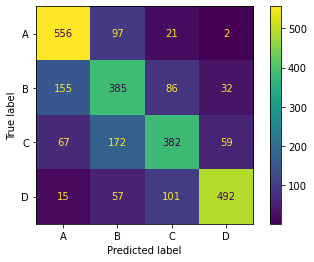

In [23]:
DT_model_5 = DecisionTreeClassifier(max_depth=11,min_samples_split=40,max_features=11, criterion="gini", random_state=1)
DT_model_5.fit(x_train, y_train)
plot_confusion_matrix(DT_model_5,x_test,y_test)

##### Confusion Matrix for SVM model

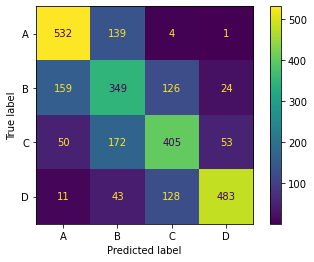

In [24]:
plot_confusion_matrix(svc_model_8,x_test,y_test)

# Elements of the confussion matrix that are worst errors

* people with poor body performance(D) wrongly classified as excellent(A) body performance
* people with normal body performance(C) wrongly classified as excellent(A) body performance

# Recommendation

I would recommend SVM classifier, although the decision tree classifier did better in accuracy , there is a very small difference in the accuracy level compared with the risk of misclassifying D and C class as A. The decision tree model misclassified more C and D classes as A. People who have A class of body may be candidates for intense military training. We do not want false Positives when looking for candidates who are fit for such. 